In [1]:
import scanpy as sc
import pandas as pd

[Executed on 2023-11-27 16:39:12.598349]


In [3]:
adata=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/adata_with_Sgns_first_glance.h5ad')
adata

[Executed on 2023-11-27 16:49:09.540202]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-11-24 10:06:04.259011]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


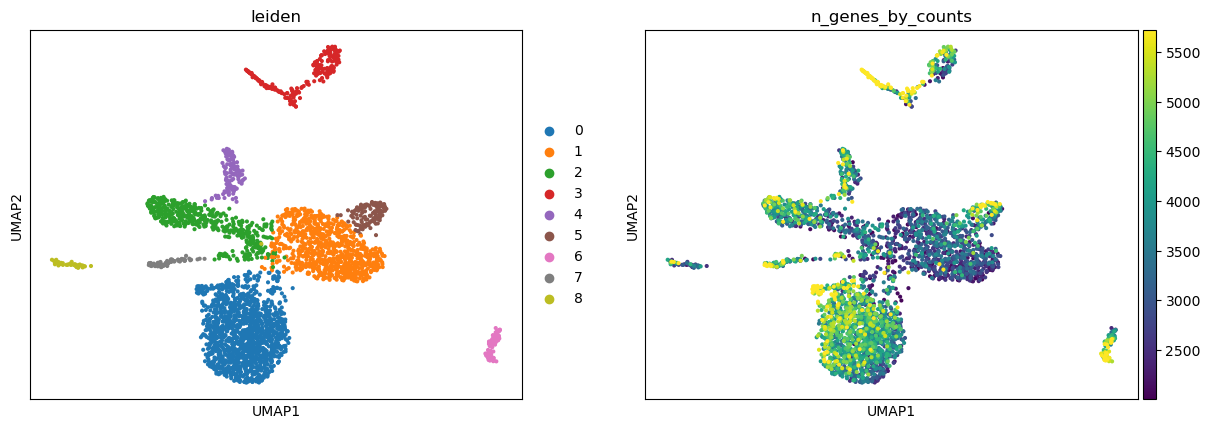

In [5]:
sc.pl.umap(adata,color=['leiden','n_genes_by_counts'],vmax='p95')

In [8]:
import imp
cell_marker=imp.load_source('cell_marker','/home/juany/code/Neuron_Development/SGNs/cell_marker.py')


[Executed on 2023-11-24 10:10:23.418342]


In [10]:
import cell_marker
markers=cell_marker.cell_type_markers

[Executed on 2023-11-24 10:10:50.317728]


In [11]:
markers

[Executed on 2023-11-24 10:10:54.279436]


{'Schwann_cells': ['Sox10', 'Mpz', 'Pmp22'],
 'Osteocytes': ['Phex', 'Slc6a20a', 'Slc13a3'],
 'Fibrocyte': ['Coch', 'Lum', 'Dcn'],
 'Osteoblasts': ['Dlx5', 'Runx2', 'Bglap'],
 'chondrocyte': ['Prg4', 'Slc26a2', 'Frzb'],
 'Basal': ['Cldn11', 'Clu', 'Nbl1'],
 'immune': ['Lyz2', 'Cd74', 'Ms4a6c', 'Ptprc'],
 'endothelial': ['Flt1', 'Robo4', 'Tie1'],
 'Pericytes': ['Rgs5', 'Pdgfrb', 'Apoe'],
 'Satellite_glial_cells': ['Kcnj10', 'Slc12a2', 'Fbln2'],
 'Oligo': ['Mobp', 'Mog', 'Mag', 'Olig1', 'Nkx2-2'],
 'Type_2_neuron': ['Plk5', 'Prph', 'Rxrg'],
 'Type_1A_neuron': ['B3gat1', 'Mdga1', 'Obscn'],
 'Type_1B_neuron': ['Btbd9', 'Ttn', 'Rasgrp2'],
 'Type_1C_neuron': ['Pou4f1', 'Espn', 'Runx1', 'Lypd1'],
 'nmSCs': ['Scn7a', 'Cdh19', 'Apoe']}

[Executed on 2023-11-24 10:11:55.795118]


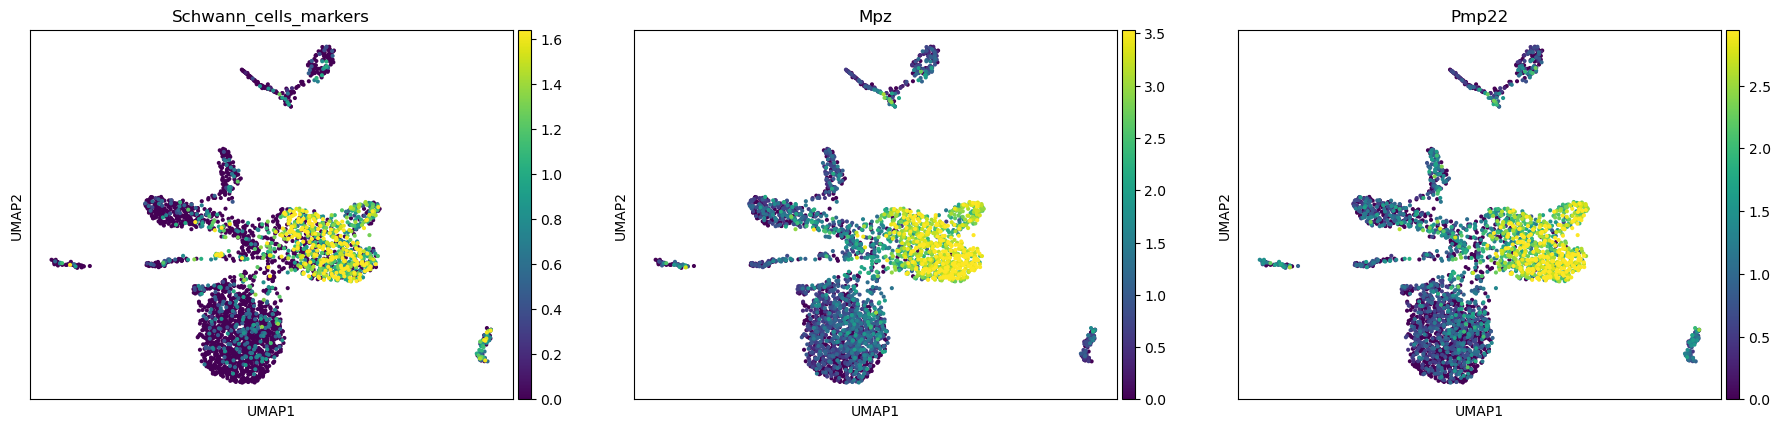

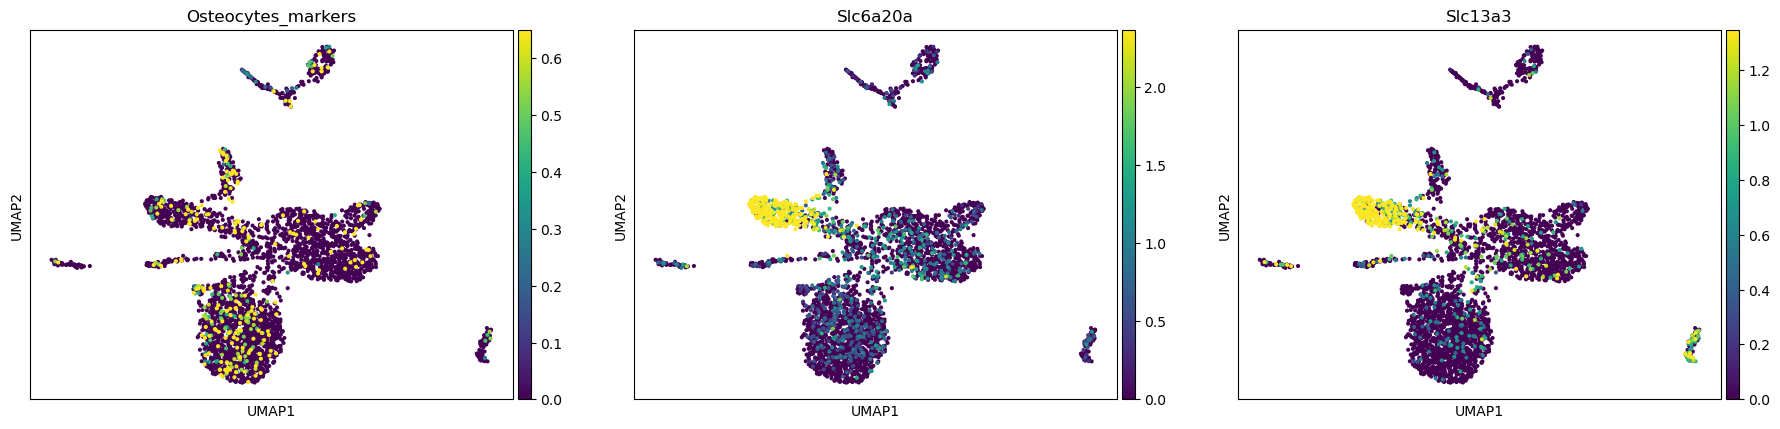

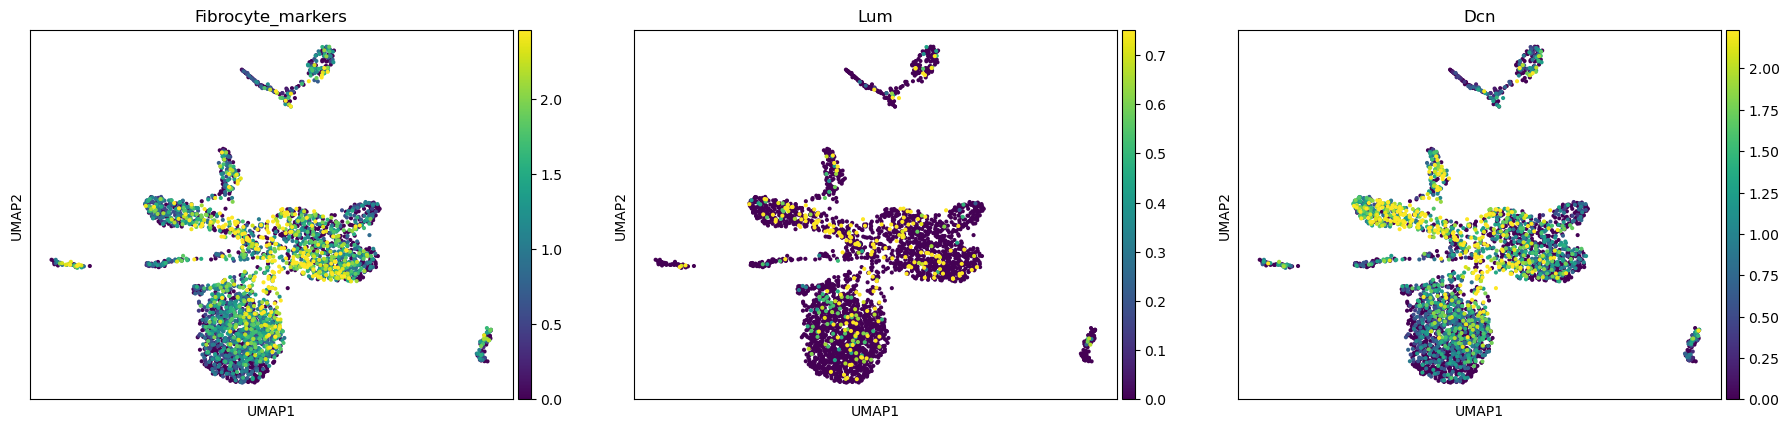

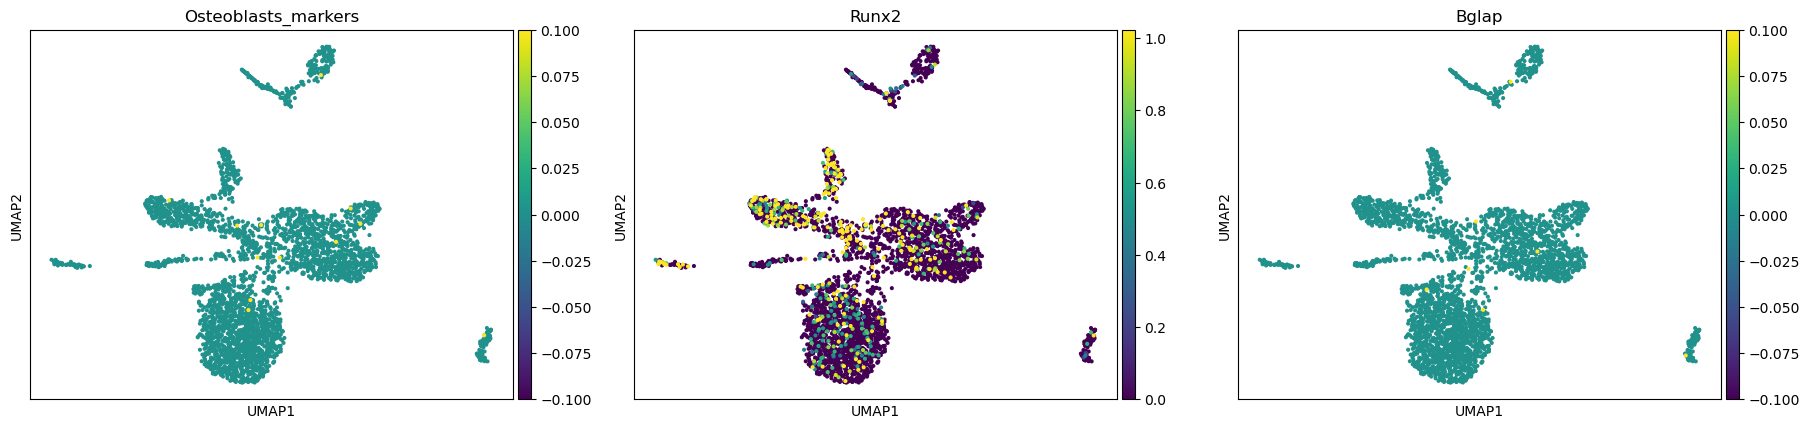

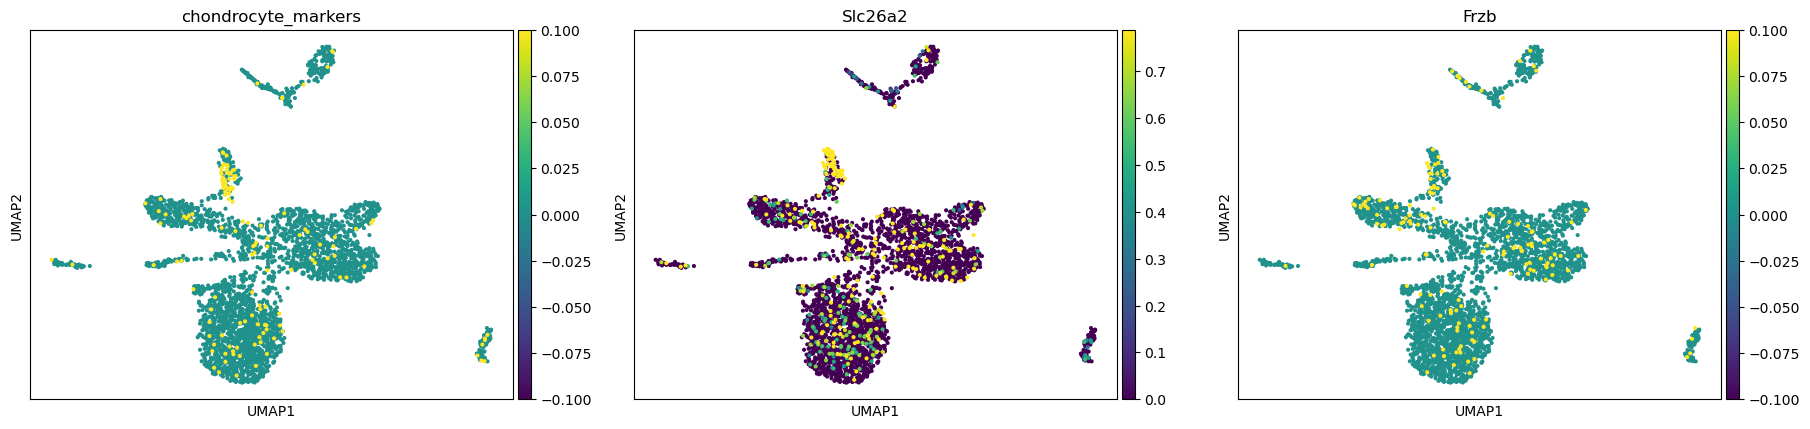

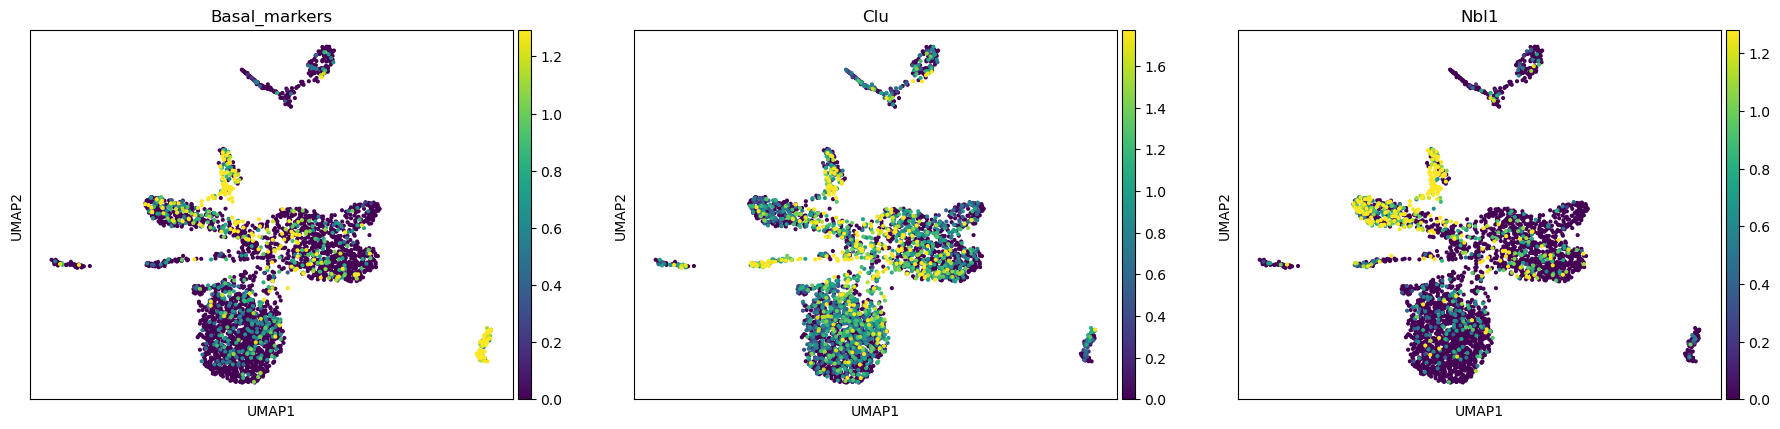

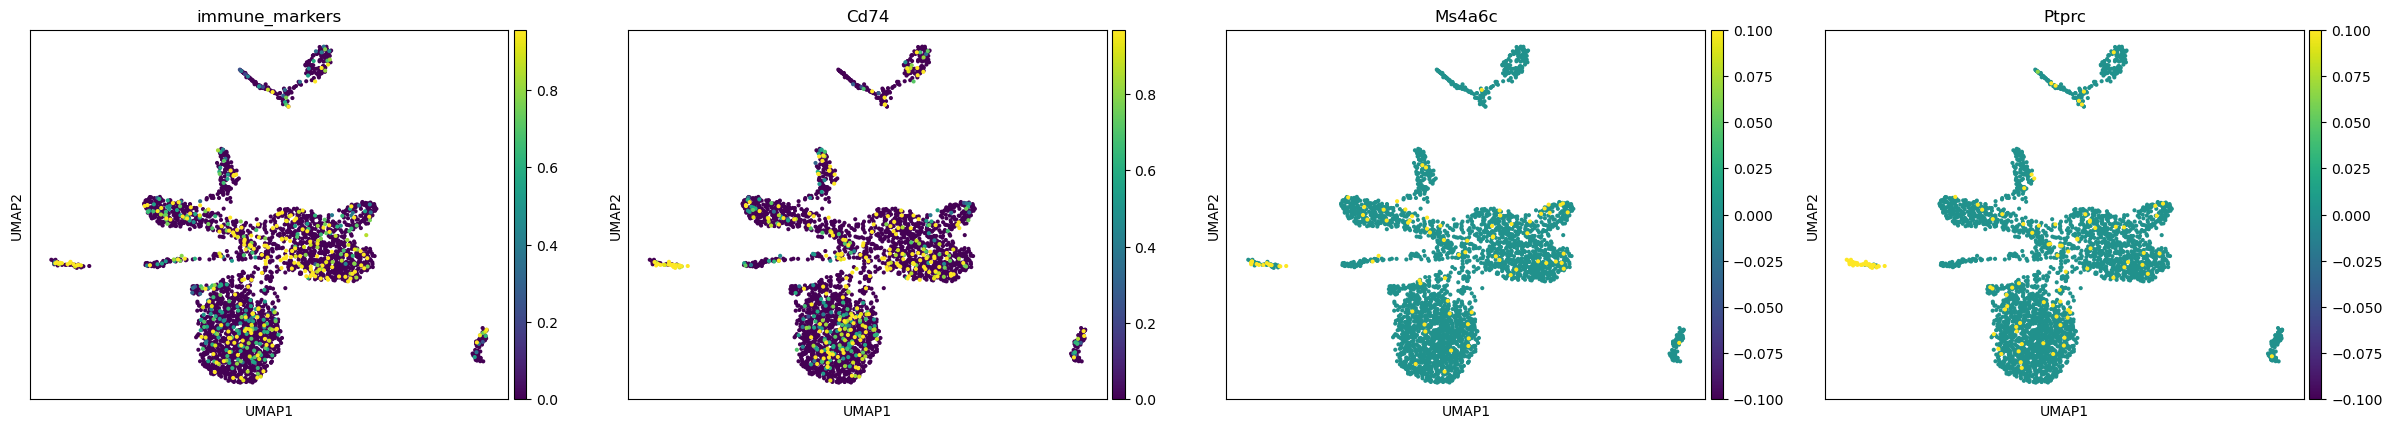

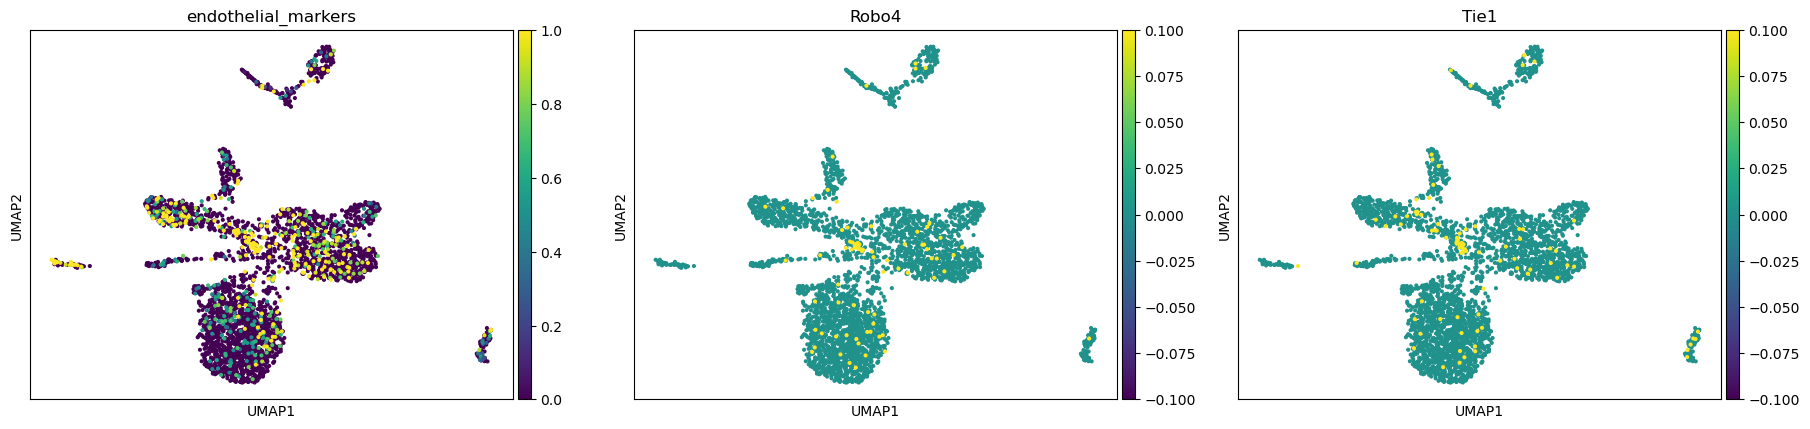

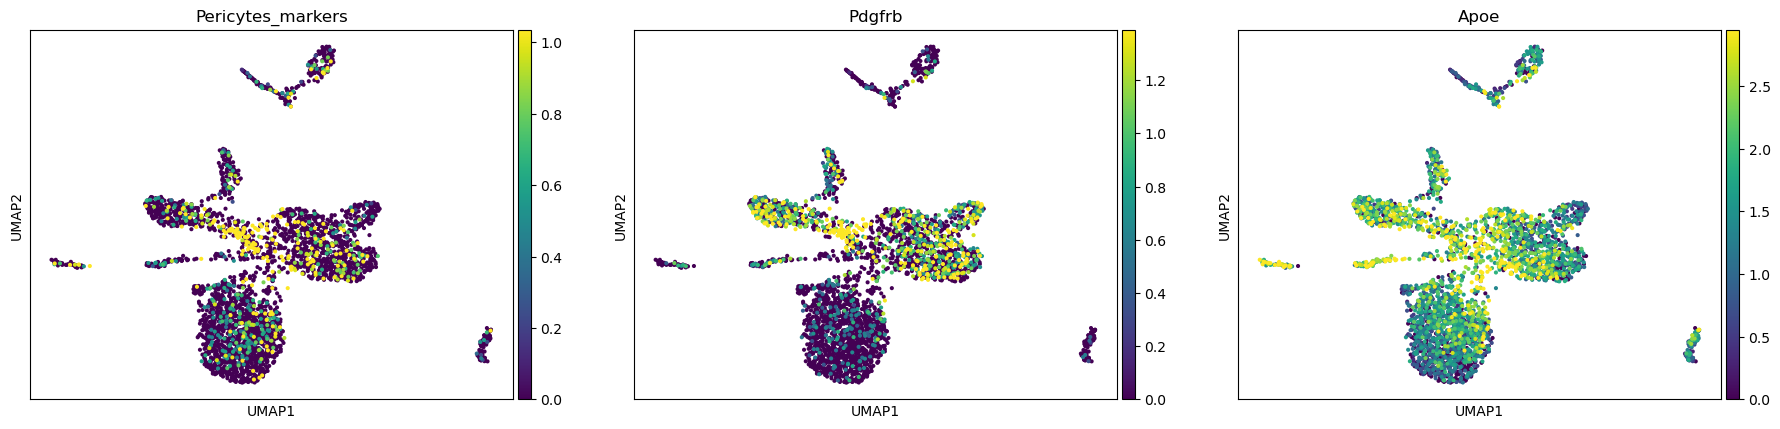

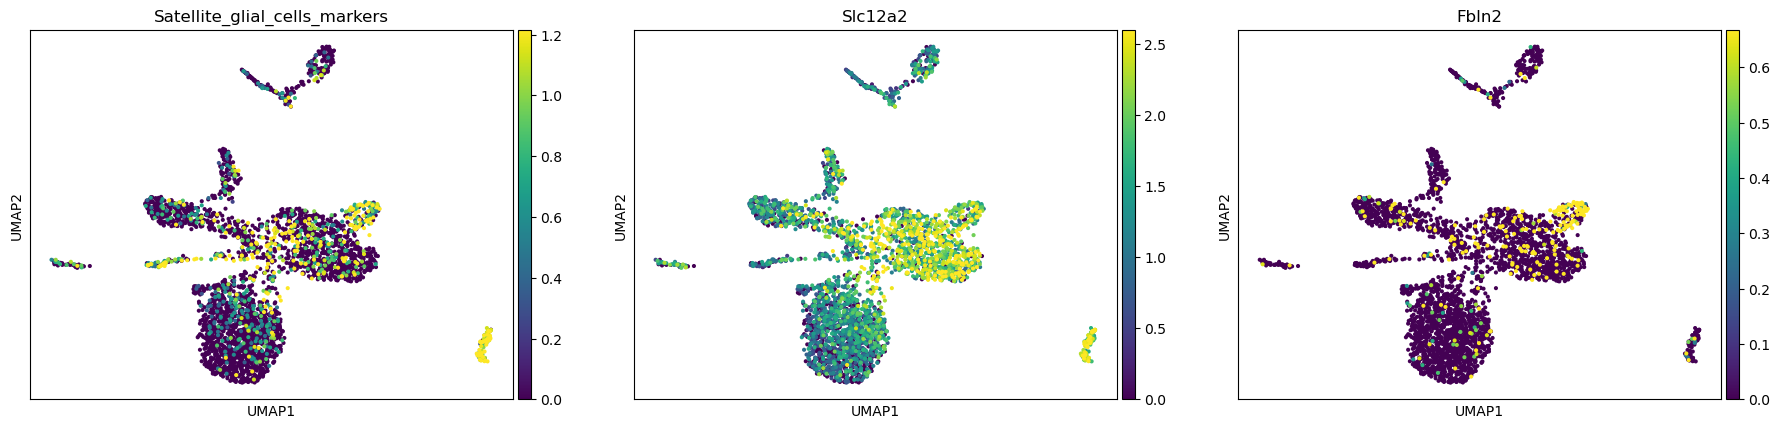

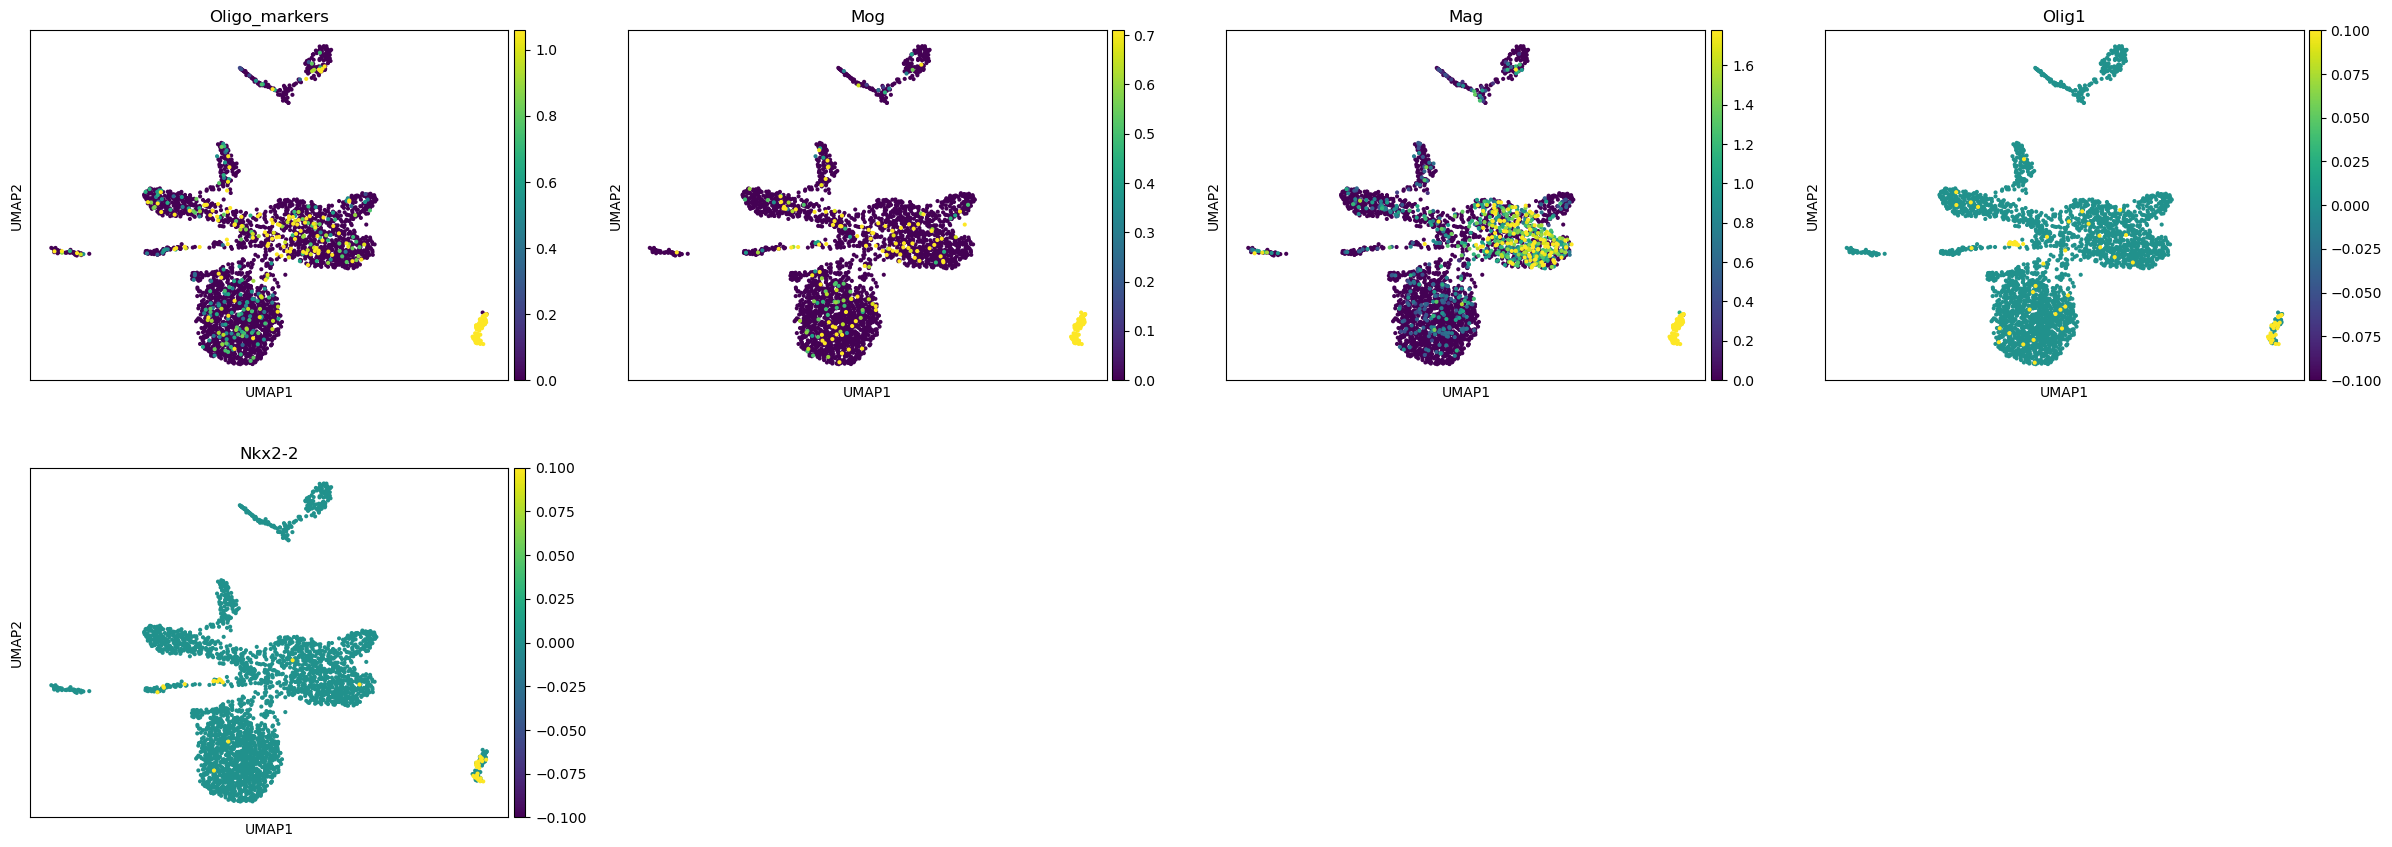

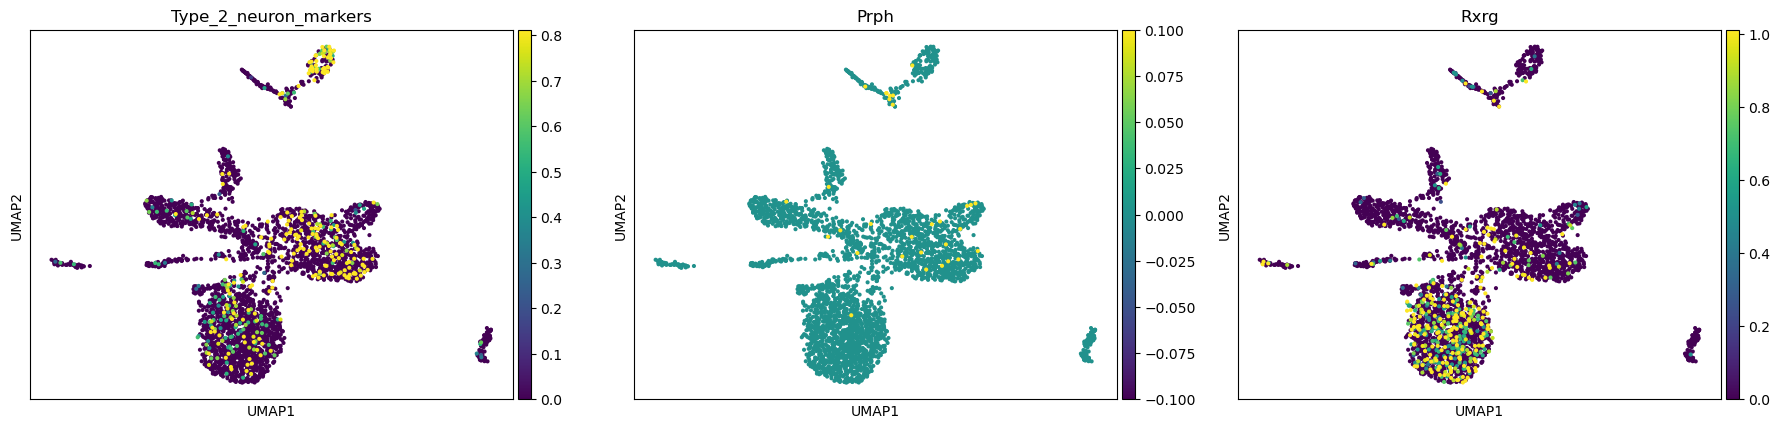

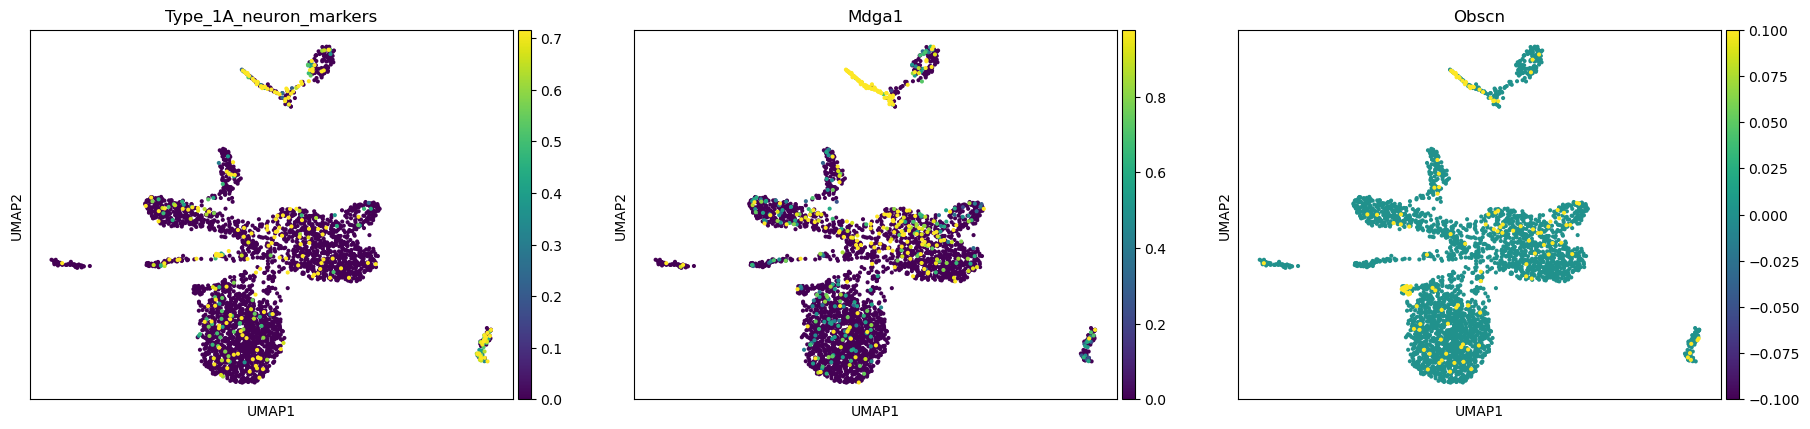

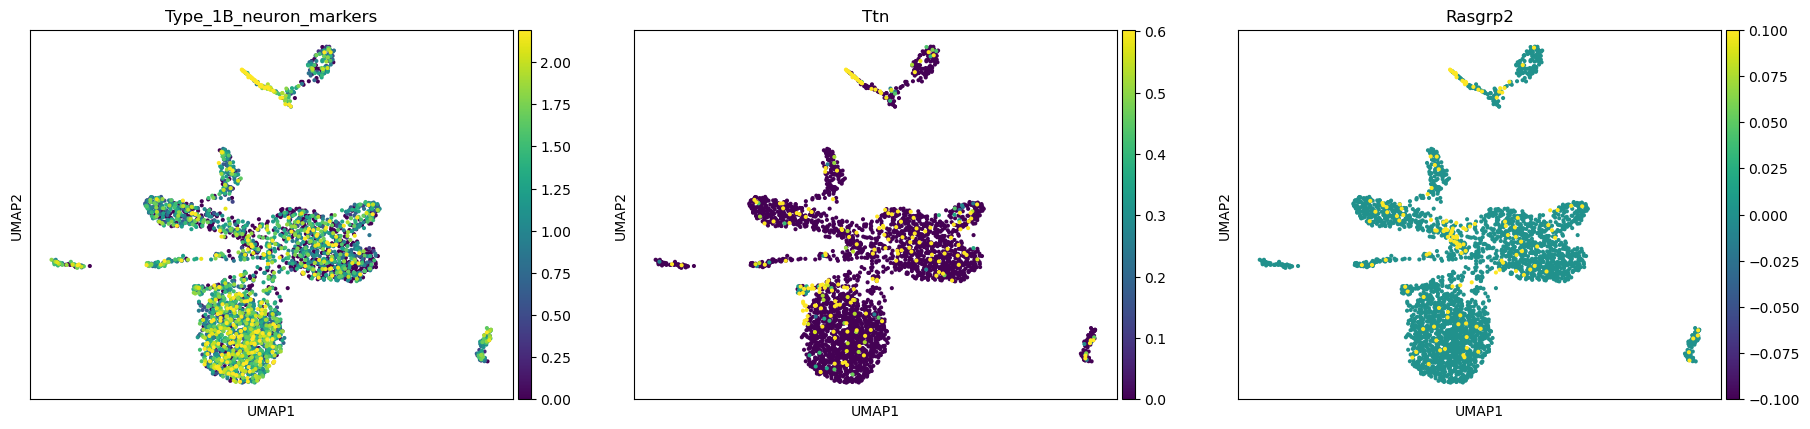

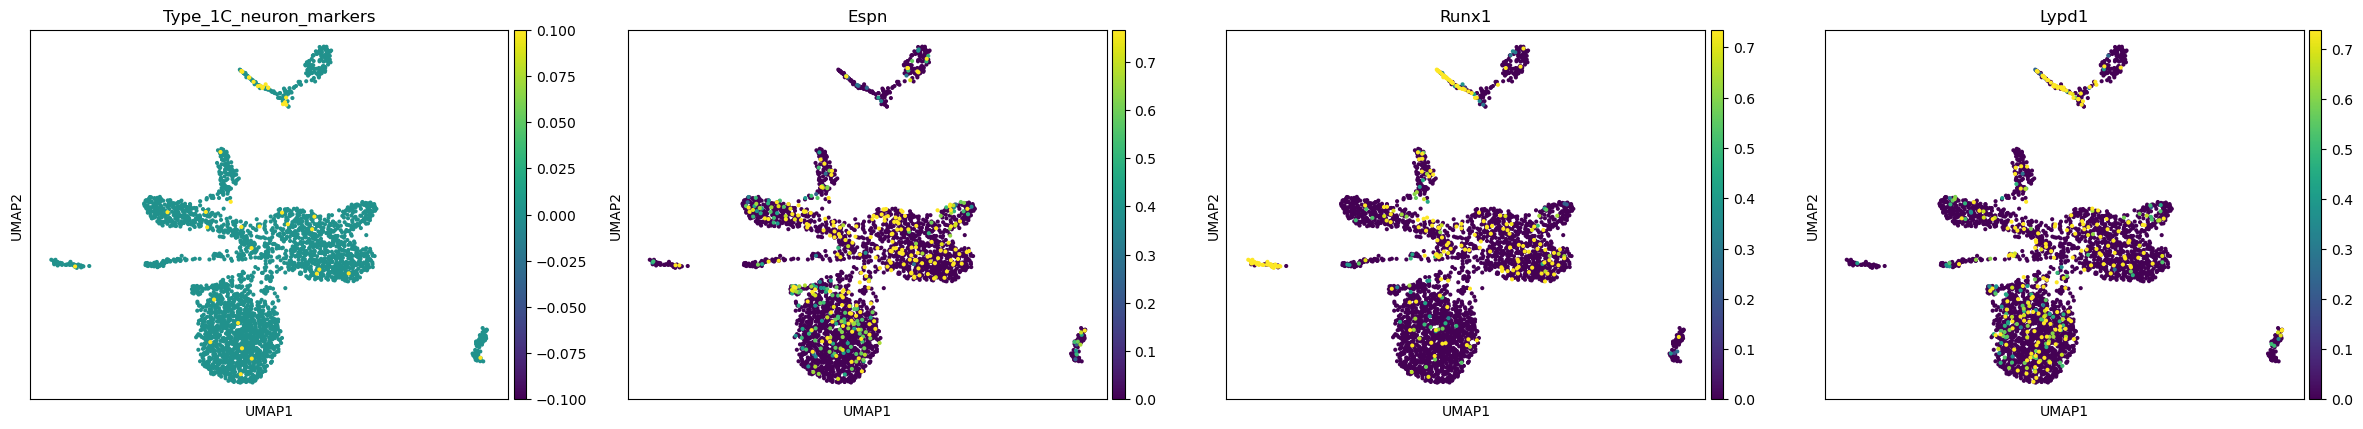

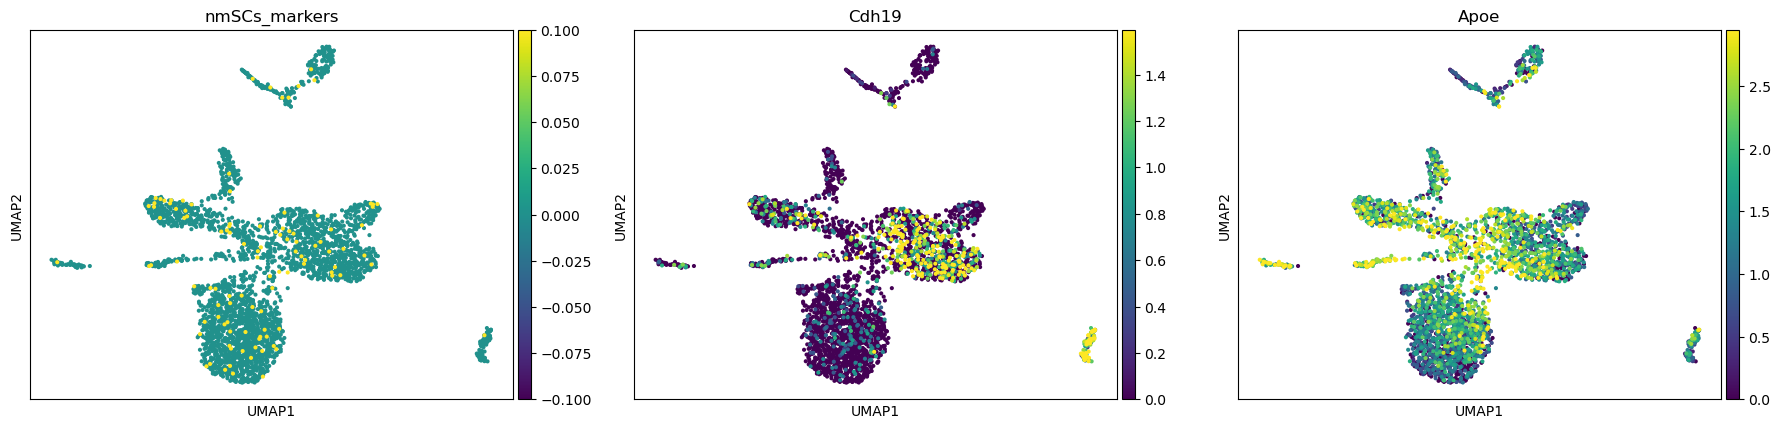

In [13]:
for cell_type, gene_list in markers.items():
    sc.pl.umap(adata,color=gene_list,vmax='p95',layer='log1p',title=cell_type+'_markers')

[Executed on 2023-11-24 11:51:09.461814]


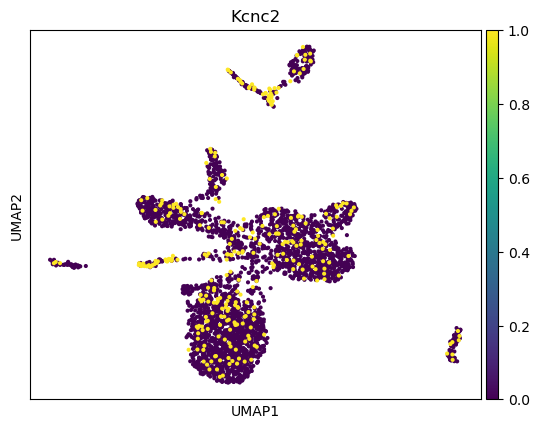

In [65]:
sc.pl.umap(adata,color='Kcnc2',vmax='p95',title='Kcnc2')

In [ ]:
possible_neuron=adata[adata.obs['leiden'].isin(['3'])]
sc.pl.umap(possible_neuron,color='leiden')

[Executed on 2023-11-24 11:21:02.678702]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

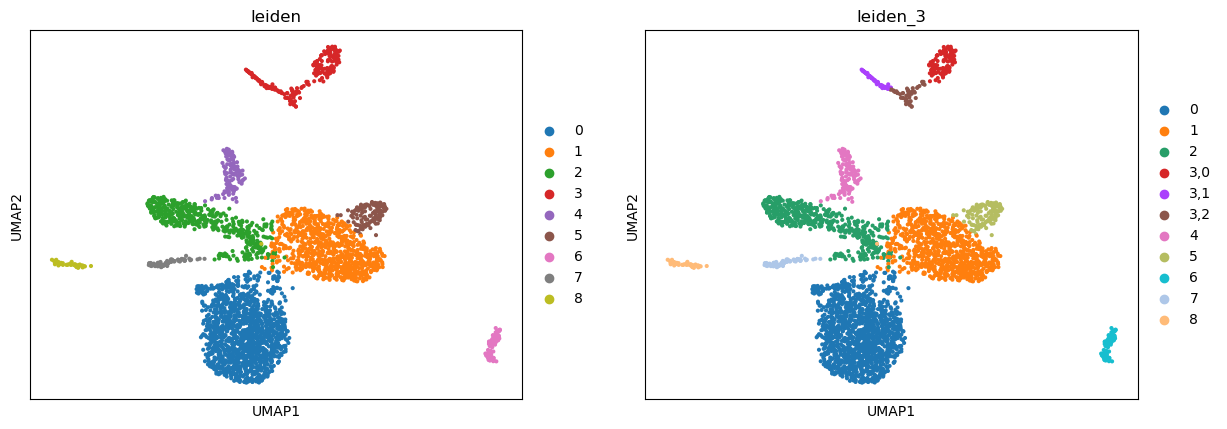

In [53]:
sc.tl.leiden(adata,restrict_to=('leiden', ['3']),key_added='leiden_3',resolution=0.3)
sc.pl.umap(adata,color=['leiden','leiden_3'],vmax='p95')

[Executed on 2023-11-24 10:55:51.164249]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

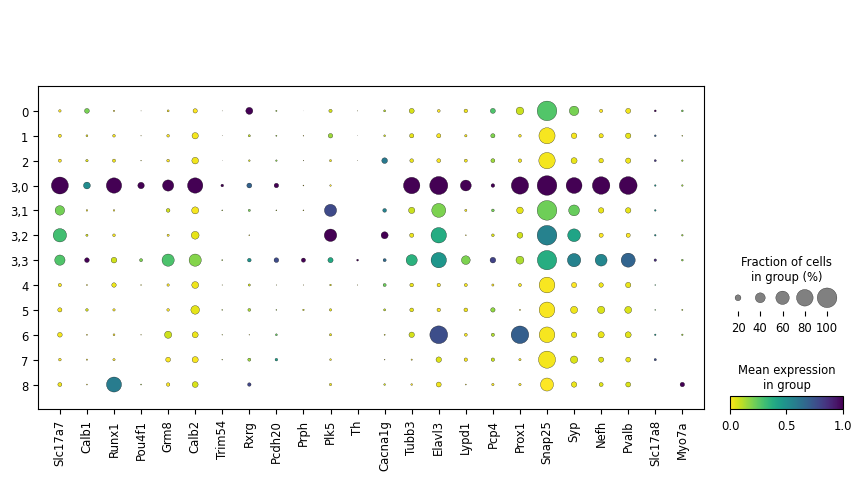

In [31]:
#From article Neuronal heterogeneity and stereotyped connectivity in the auditory afferent system 
neuron_cell_markers=['Slc17a7','Calb1','Runx1','Pou4f1','Grm8','Calb2','Trim54','Rxrg','Pcdh20','Prph','Plk5','Th','Cacna1g','Tubb3','Elavl3','Lypd1','Pcp4','Prox1','Snap25','Syp','Nefh','Pvalb','Slc17a8','Myo7a']
sc.pl.dotplot(adata,neuron_cell_markers,groupby='leiden_3',standard_scale='var',cmap='viridis_r')

[Executed on 2023-11-24 11:14:03.468640]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

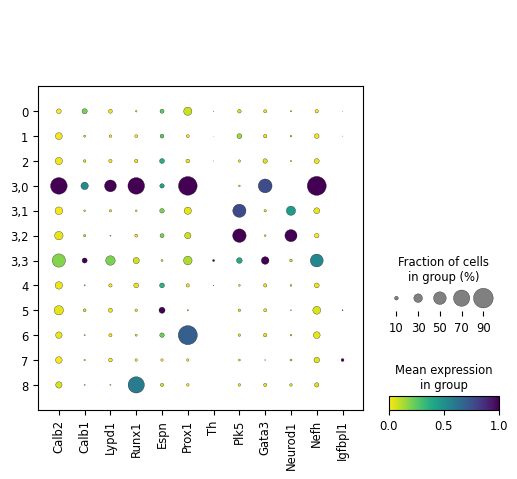

In [38]:
type_1_marker=['Calb2','Calb1','Lypd1','Runx1','Espn','Prox1','Th','Plk5','Gata3','Neurod1','Nefh','Igfbpl1']
sc.pl.dotplot(adata,type_1_marker,groupby='leiden_3',standard_scale='var',cmap='viridis_r')

In [37]:
adata.obs['leiden_3'].value_counts()

[Executed on 2023-11-24 11:12:10.956754]


leiden_3
0      1388
1       851
2       504
4       130
5       117
6        88
7        71
3,0      57
3,1      55
3,2      55
8        50
3,3      47
Name: count, dtype: int64

In [54]:
sc.tl.rank_genes_groups(adata,groupby='leiden_3',method='wilcoxon',layer='log1p')

[Executed on 2023-11-24 11:21:22.597960]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [41]:
adata

[Executed on 2023-11-24 11:18:42.474100]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'leiden_3'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_3_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

In [55]:
#pandas show degs
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

[Executed on 2023-11-24 11:21:52.364574]


0        1         2      3,0      3,1      3,2       4        5  \
0     Rian     Hcn1     Cped1     Chn2    Csmd1   Snhg11    Bnc2    Pde1c   
1     Meg3     Utrn    Atp1a2    Fgf14    Asic3   Adam23   Foxp2  Slc6a15   
2  Gm27000      Mpz   Colec12    Rims1   Spock3   Frmpd4   Cped1    Lama1   
3    Nalf1      Qki  Arhgap29    Syne1    Cntn5   Spock3    Ank2    Mpzl1   
4   Ptprn2    Neat1     Dock6    Nrxn3   Frmpd4  Cntnap2    Eya2    Npas3   
5     Gnas      Mbp   Slc24a3   Snhg14    Hecw1    Csmd1   Tmtc1    Ddhd1   
6    Kcnh8     Art3     Sned1    Astn2   Elavl4  Zfp804a    Mrc2    Slit3   
7  Elapor1  Plekha4     Ptgds   Rbfox3   Snhg11     Dnm1   Stk39    Hdac9   
8   Pde10a     Aatk        Cp     Ryr2  Cntnap2    Gria3  Phldb2    Trpm3   
9     Ksr2    Gfra1  Mir100hg  Cacna1a      Nin   Atp1a3   Dock5    Maml2   

               6         7         8  
0  4930420G21Rik  Slc39a12    Inpp5d  
1          Prr5l    Slc4a4  AU020206  
2        Slc24a2    Slc1a2     Dock2  
3            Trf      Aqp4    Tgfbr1  
4         Phlpp1    Sema6d      Hexb  
5         Tmeff2     Luzp2     Dock8  
6     St6galnac3       Ntm     Ptprc  
7           Plp1    Ptprz1       Fyb  
8          Pde4b    Bmpr1b       Lyn  
9            Mog      Rfx4   Nckap1l

In [61]:
adata

[Executed on 2023-11-24 11:45:25.265551]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'leiden_3'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_3_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-11-24 11:45:31.258832]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

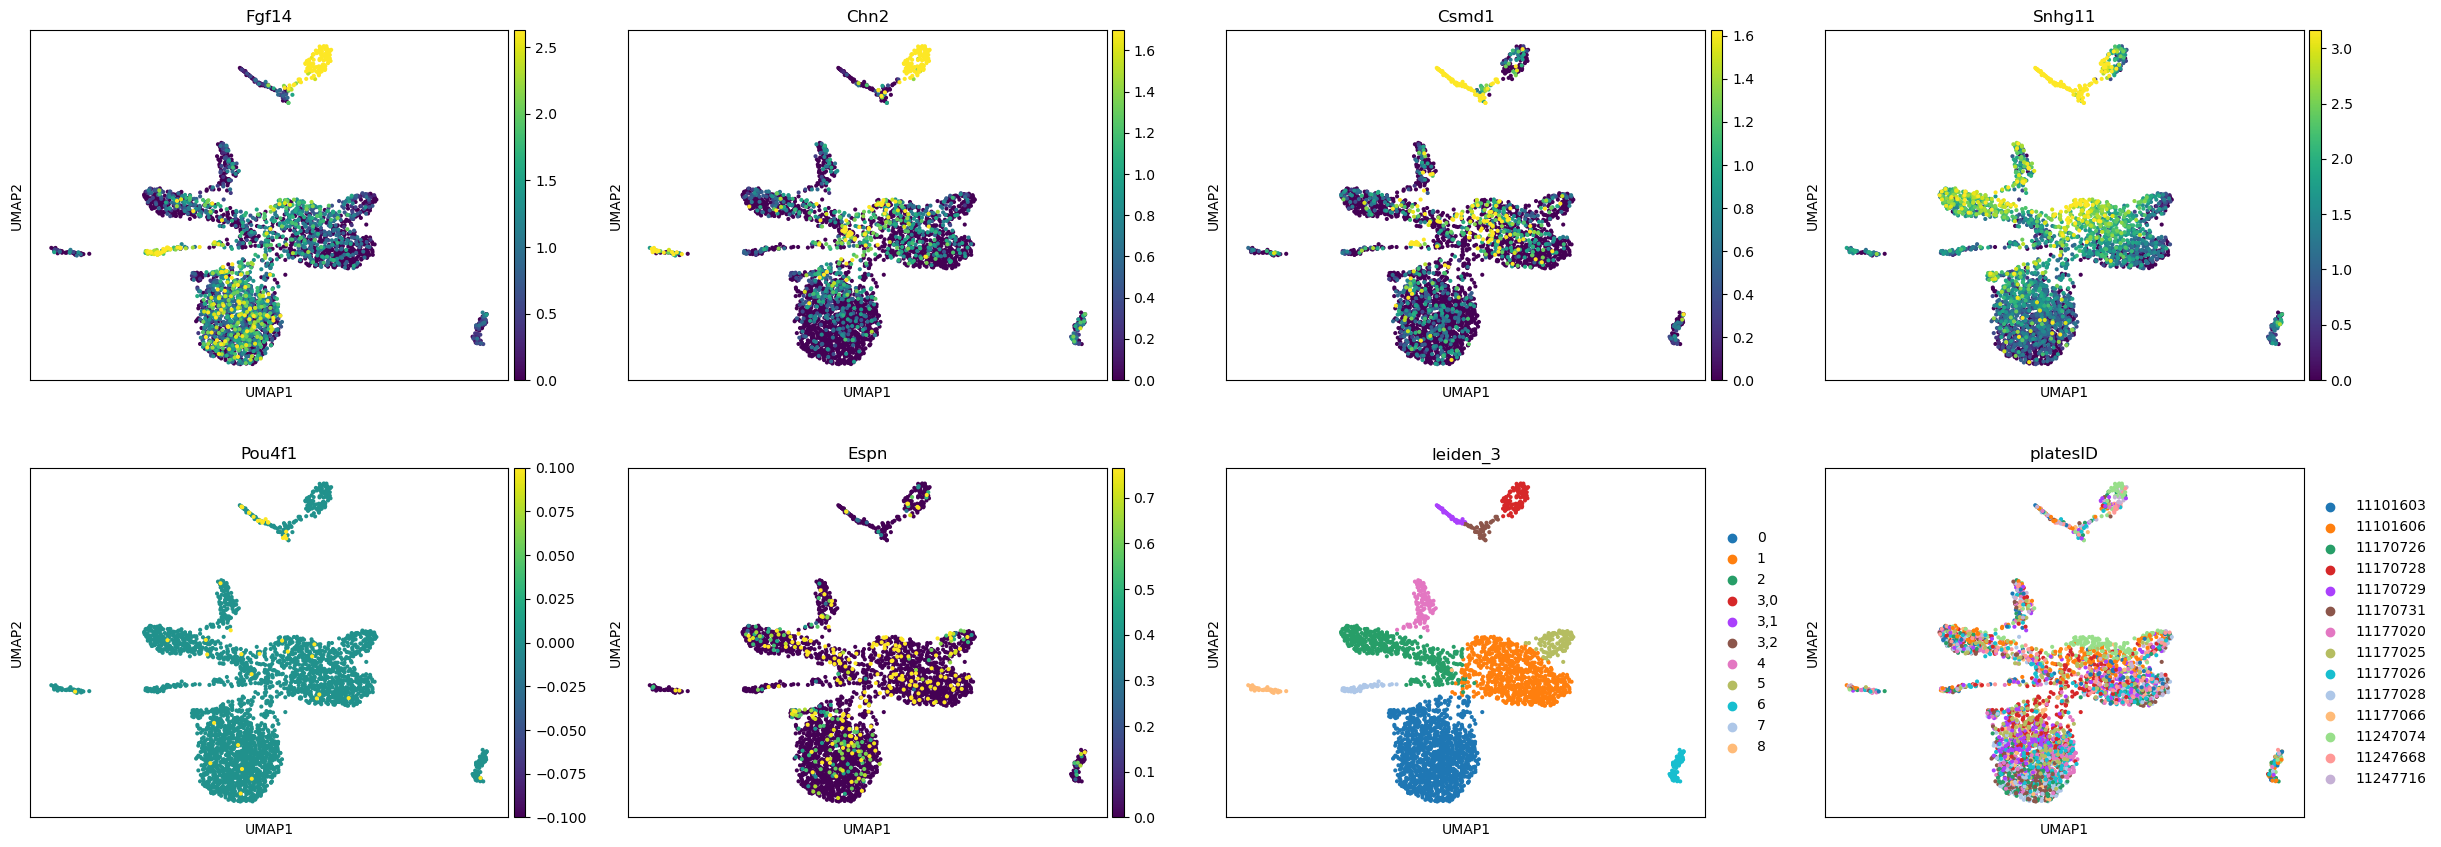

In [62]:
sc.pl.umap(adata,color=['Fgf14','Chn2','Csmd1','Snhg11','Pou4f1','Espn','leiden_3','platesID'],vmax='p95',layer='log1p')

[Executed on 2023-11-24 11:45:58.051337]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

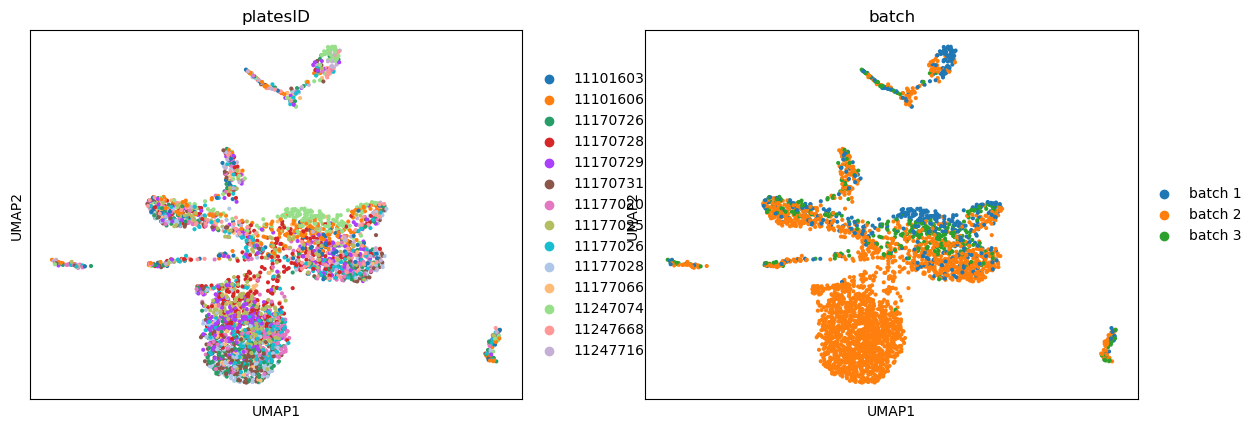

In [63]:
sc.pl.umap(adata,color=['platesID','batch'])

In [4]:
import pandas as pd

# Check if 'cell_type' column already exists, if not create it
if 'cell_type' not in adata.obs:
    adata.obs['cell_type'] = pd.NA  # Initialize with missing values

# Assign "Schwann cell" to cells where 'leiden' is '1'
adata.obs.loc[adata.obs['leiden'] == '1', 'cell_type'] = 'Schwann cell'


[Executed on 2023-11-27 17:14:51.258518]


[Executed on 2023-11-27 17:41:02.218061]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

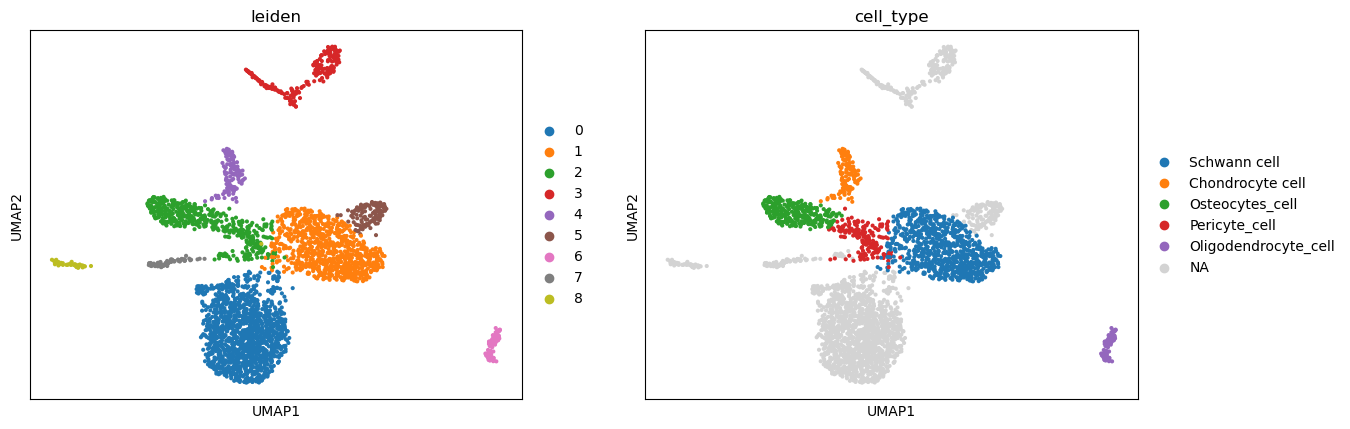

In [26]:
sc.pl.umap(adata,color=['leiden','cell_type'])

In [5]:
adata

[Executed on 2023-11-27 17:15:00.077551]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-11-27 17:23:16.901287]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

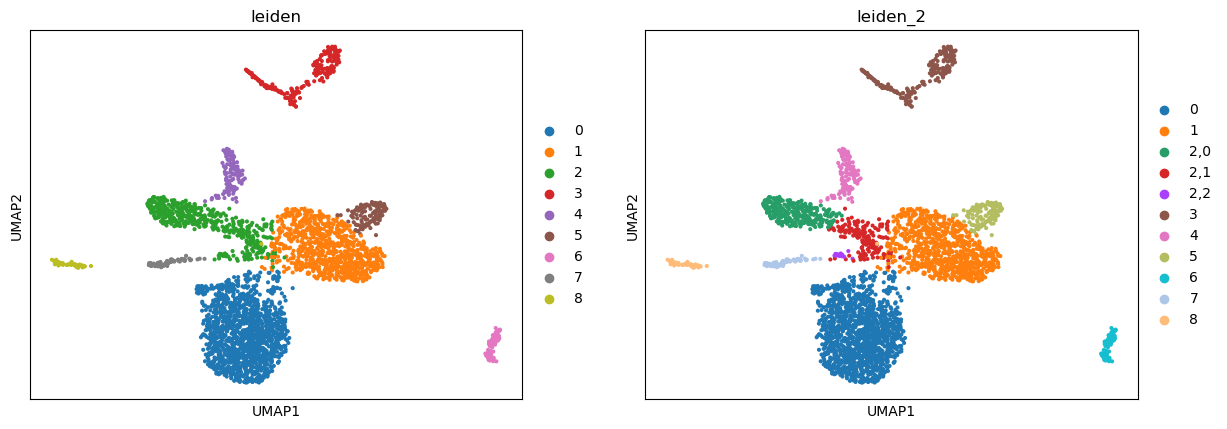

In [8]:
sc.tl.leiden(adata,restrict_to=('leiden', ['2']),key_added='leiden_2',resolution=0.3)
sc.pl.umap(adata,color=['leiden','leiden_2'],vmax='p95')

In [24]:
# Check if 'cell_type' column already exists, if not create it as a categorical column
if 'cell_type' not in adata.obs:
    adata.obs['cell_type'] = pd.Categorical([])

# Add 'Chondrocyte cell' to the categories if it's not already there
if 'Chondrocyte cell' not in adata.obs['cell_type'].cat.categories:
    adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Chondrocyte cell'])

# Assign "Chondrocyte cell" to cells where 'leiden' is '4'
adata.obs.loc[adata.obs['leiden'] == '4', 'cell_type'] = 'Chondrocyte cell'


[Executed on 2023-11-27 17:34:21.484954]


In [17]:
# Check if 'cell_type' column already exists, if not create it as a categorical column
if 'cell_type' not in adata.obs:
    adata.obs['cell_type'] = pd.Categorical([])

# Add 'Chondrocyte cell' to the categories if it's not already there
if 'Osteocytes_cell' not in adata.obs['cell_type'].cat.categories:
    adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Osteocytes_cell'])

# Assign "Chondrocyte cell" to cells where 'leiden' is '4'
adata.obs.loc[adata.obs['leiden_2'] == '2,0', 'cell_type'] = 'Osteocytes_cell'


[Executed on 2023-11-27 17:28:55.964451]


In [19]:
# Check if 'cell_type' column already exists, if not create it as a categorical column
if 'cell_type' not in adata.obs:
    adata.obs['cell_type'] = pd.Categorical([])

# Add 'Chondrocyte cell' to the categories if it's not already there
if 'Pericyte_cell' not in adata.obs['cell_type'].cat.categories:
    adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Pericyte_cell'])

# Assign "Chondrocyte cell" to cells where 'leiden' is '4'
adata.obs.loc[adata.obs['leiden_2'] == '2,1', 'cell_type'] = 'Pericyte_cell'


[Executed on 2023-11-27 17:31:14.604064]


In [25]:
# Check if 'cell_type' column already exists, if not create it as a categorical column
if 'cell_type' not in adata.obs:
    adata.obs['cell_type'] = pd.Categorical([])

# Add 'Chondrocyte cell' to the categories if it's not already there
if 'Oligodendrocyte_cell' not in adata.obs['cell_type'].cat.categories:
    adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Oligodendrocyte_cell'])

# Assign "Chondrocyte cell" to cells where 'leiden' is '4'
adata.obs.loc[adata.obs['leiden'] == '6', 'cell_type'] = 'Oligodendrocyte_cell'


[Executed on 2023-11-27 17:34:32.028605]


In [21]:
adata[~adata.obs['leiden_2'].isin(['2,2'])]
adata

[Executed on 2023-11-27 17:32:04.317111]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'cell_type_colors', 'leiden_2_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

In [30]:
adata.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/First_annotated.h5ad')

[Executed on 2023-11-27 17:44:42.975200]
